In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
%matplotlib inline

In [34]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', s=55, label='test set')

# PCA 四个步骤：
- 数据标准化
- 构造协方差矩阵
- 获得协方差矩阵的特征值和特征向量
- 按降序排列特征值所对应的特征向量

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [4]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [5]:
sc = StandardScaler()

In [7]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

构造协方差矩阵 <br>
$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n}(x_j^i-\mu_j)(x_k^i-\mu_k)$ <br>
$\mu_j$和$\mu_k$分别为特征j和k的均值。由于进行了特征缩放，那么特征均值为0. 所以<br>
如果特征之间的协方差为正，说明它们会同时增减，反之，表示两个特征会朝着相反的方向变动。 <br>
协方差的特征向量代表主成分，对应的特征值大小就决定了特征向量的重要性。

In [14]:
#计算协方差矩阵
cov_mat = np.cov(X_train_std.T)

In [15]:
#求特征值和特征向量
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)

In [13]:
print('\n Eigenvalues \n%s' % eigen_vals)


 Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


绘制**方差贡献率**图像(方差贡献率是指特征值与所有特征值之和的比值) <br>
$\frac{\lambda_j}{\sum_{j=1}^{d}\lambda_j}$

In [16]:
tot = sum(eigen_vals)

In [17]:
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

In [18]:
#计算出累计方差
cum_var_exp = np.cumsum(var_exp)

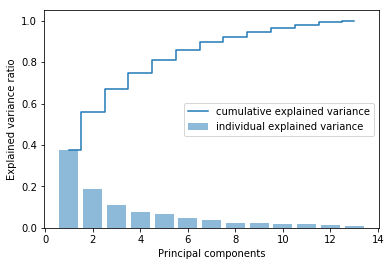

In [21]:
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# PCA后三步骤：
- 特征值降序排列
- 根据挑选出来的特征向量构造映射矩阵
- 使用映射矩阵将数据转换到低维的子空间上

In [22]:
#降序排列特征值
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [25]:
#构造映射矩阵
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n', w)

('Matrix W: \n', array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]]))


In [26]:
#进行映射
X_train_std[0].dot(w)

array([ 2.59891628,  0.00484089])

In [30]:
X_train_pca = X_train_std.dot(w)

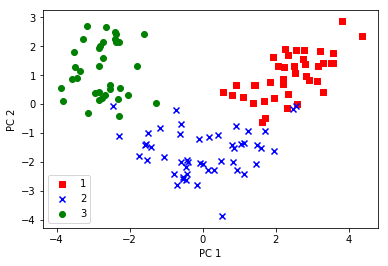

In [32]:
#可视化降维之后的数据
colors = ['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
               X_train_pca[y_train==l,1],
               c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

图中显示，相较于第二主成分(y轴),数据更多的沿着x轴方向分布，同时也可以主观的看到，线性分类器能够对降维后的数据进行划分了。

# 使用Sklearn进行主成分分析

In [36]:
pca = PCA(n_components=2)
lr = LogisticRegression()

In [37]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [38]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

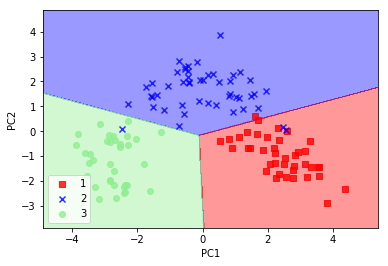

In [40]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

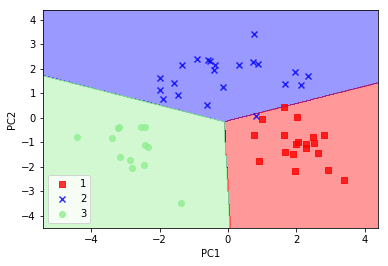

In [41]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()